> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：电影

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# 查看数据集的行列数
df.shape

(10866, 21)

In [5]:
# 查看各列数据的格式，以及各列数据缺失情况

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>将电影数据集读取为df  
并查看数据集的行列数，各列数据的格式，以及各列数的缺失情况

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（请用更具体的标题来代替该标题。）

In [3]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。

df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

>删除重复的行，并检查

In [5]:
df = df[['popularity','genres','cast','director','vote_count','vote_average','release_year','budget_adj','revenue_adj', 'budget','revenue']]

>选取对分析有帮助的列

In [6]:
# 查看各列缺失值情况

df.isna().sum()

popularity       0
genres          23
cast            76
director        44
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
budget           0
revenue          0
dtype: int64

In [7]:
# 有两个问题需要研究，创建df的两个副本df_1和df_2，进行不同的数据整理

df_1 = df.copy()
df_2 = df.copy()

In [8]:
# 问题一只涉及电影类别，因此只需要清理genres中的缺失值

df_1 = df_1.dropna(subset=['genres'])

>去掉缺['genres']列中缺失的行

In [9]:
# 查看df_1中genres列中缺失值 情况

df_1.isnull().sum()

popularity       0
genres           0
cast            75
director        42
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
budget           0
revenue          0
dtype: int64

In [10]:
df_1.shape

(10842, 11)

In [11]:
df_1.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=10842)

In [12]:
# 问题二，研究的问题涉及到 电影类别，演员，导演，
# 需要对所有有缺失值的列，清理缺失值

df_2.dropna(inplace=True)

In [13]:
# 看是否清空了所有的缺失值

df_2.isna().sum().any()  

False

In [14]:
df_2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=10731)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

## 研究问题 1 电影类型与受欢迎程度的关系 

In [15]:
# 将genres列拆分 得到新的Series

gen_n = df_1.genres.str.split('|')
gen_n.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [16]:
# 将拆分出来的电影类型列，转化为列表格式

gen_n_list = gen_n.tolist()  

In [17]:
# 创建一个dataframe，包含拆分出来的电影类型。并设置了列名

df_gen = pd.DataFrame(data=gen_n_list, columns=['g1','g2','g3','g4','g5']) 
df_gen.head()

,g1,g2,g3,g4,g5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [18]:
# 查看要合并的两个dataframe的index，是否相同，

(df_1.index == df_gen.index).all()  

# 结果不相同。

False

>要合并的两个dataframe的index  
结果不相同。

In [19]:
# 将df_gen 的index 赋值给 df_1，使df_1与df_gen的index相同，

df_1.index=df_gen.index  

In [20]:
# 按照index，合并df_1和df_gen

df_result = df_1.join(df_gen, how='outer')  
df_result.head()

,popularity,genres,cast,director,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue,g1,g2,g3,g4,g5
0,32.985763,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,5562,6.5,2015,1.379999e+08,1.392446e+09,150000000,1513528810,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Action|Adventure|Science Fiction|Thriller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,6185,7.1,2015,1.379999e+08,3.481613e+08,150000000,378436354,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Adventure|Science Fiction|Thriller,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2480,6.3,2015,1.012000e+08,2.716190e+08,110000000,295238201,Adventure,Science Fiction,Thriller,None,None
3,11.173104,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,5292,7.5,2015,1.839999e+08,1.902723e+09,200000000,2068178225,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2947,7.3,2015,1.747999e+08,1.385749e+09,190000000,1506249360,Action,Crime,Thriller,None,None


In [21]:
df_result.isna().sum()

popularity          0
genres              0
cast               75
director           42
vote_count          0
vote_average        0
release_year        0
budget_adj          0
revenue_adj         0
budget              0
revenue             0
g1                  0
g2               2328
g3               5764
g4               8862
g5              10301
dtype: int64

In [22]:
# 用melt函数，将 g1至g5 列的电影类型，转到一列里。并使其与对应的poppularity对应

df_pop_genre = df_result.melt(id_vars=['popularity'],value_vars=['g1','g2','g3','g4','g5'], value_name='genre')
df_pop_genre.head()

,popularity,variable,genre
0,32.985763,g1,Action
1,28.419936,g1,Action
2,13.112507,g1,Adventure
3,11.173104,g1,Action
4,9.335014,g1,Action


In [23]:
# 按照genre的类别，分类，并计算每一类别的mean，按照降序排序

df_end = df_pop_genre.groupby('genre').mean().sort_values(by='popularity',ascending=False)
df_end.head()

,popularity
genre,
Adventure,1.154259
Science Fiction,1.001548
Fantasy,0.992840
Action,0.926274
Animation,0.852182


>得到不同类型电影的受欢迎程度

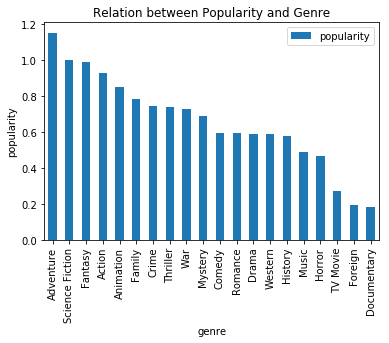

In [24]:
# 绘制电影配别和流行度的柱状图

df_end.plot(kind='bar')
plt.ylabel('popularity')
plt.title('Relation between Popularity and Genre');

## 研究问题 2  影响票房的因素

In [25]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。

df_2.isna().sum()  # 用df_2来研究问题二， 查看是否还有缺失值

popularity      0
genres          0
cast            0
director        0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
budget          0
revenue         0
dtype: int64

##   Q1 时间对票房的影响

In [26]:
# 将df_2按照发行年分分类，计算每年票房的平均值

df_year_mean = df_2.groupby('release_year',as_index=False).mean()
df_year_mean.head()

,release_year,popularity,vote_count,vote_average,budget_adj,revenue_adj,budget,revenue
0,1960,0.458932,77.531250,6.325000,5.082036e+06,3.340991e+07,6.892796e+05,4.531406e+06
1,1961,0.422827,77.580645,6.374194,1.085687e+07,7.947167e+07,1.488290e+06,1.089420e+07
2,1962,0.454783,74.750000,6.343750,1.232693e+07,4.856238e+07,1.710066e+06,6.736870e+06
3,1963,0.502706,82.823529,6.329412,1.535687e+07,3.924580e+07,2.156809e+06,5.511911e+06
4,1964,0.412428,74.690476,6.211905,6.608980e+06,5.707603e+07,9.400753e+05,8.118614e+06


In [27]:
# 将df_2按照发行年分分类，计算每年票房的中位数

df_year_median = df_2.groupby('release_year',as_index=False).median()
df_year_median.head()

,release_year,popularity,vote_count,vote_average,budget_adj,revenue_adj,budget,revenue
0,1960,0.268273,16.0,6.25,0.0,0.0,0.0,0.0
1,1961,0.265092,18.0,6.30,0.0,0.0,0.0,0.0
2,1962,0.299075,17.5,6.45,0.0,0.0,0.0,0.0
3,1963,0.249940,22.0,6.35,0.0,0.0,0.0,0.0
4,1964,0.194472,15.5,6.40,0.0,0.0,0.0,0.0


Text(0.5,1,'Median Revenue with Time')

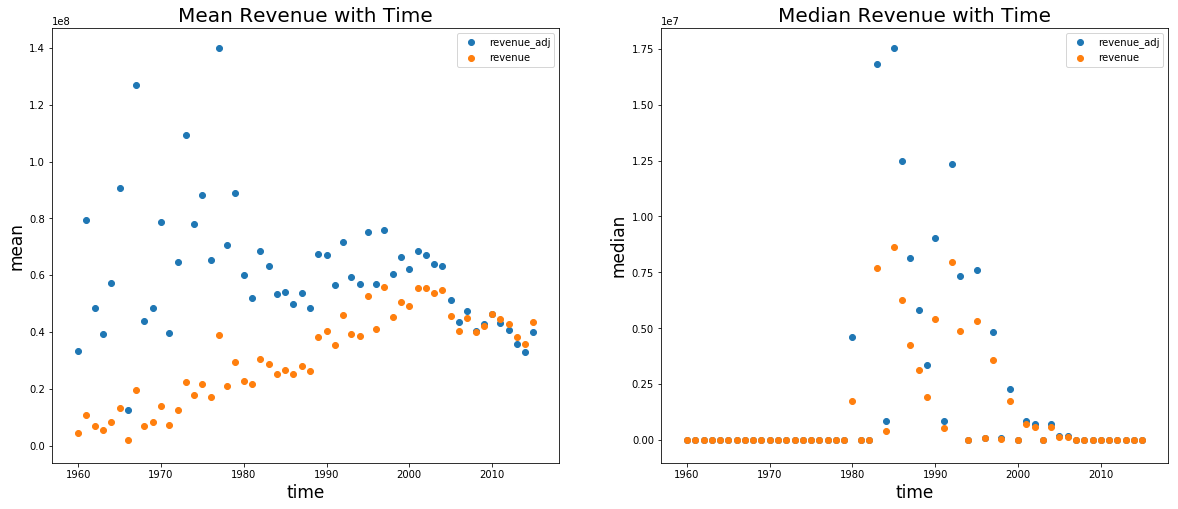

In [28]:
# 绘制票房的平均数和中位数，随着时间的变化

fig = plt.figure(figsize=(20,8)) #创建画布

ax1 = fig.add_subplot(121)       # 在画布上创建 第一幅图
x1 = df_year_mean.release_year
y1 = df_year_mean.revenue_adj
ax1.scatter(x1, y1,label='revenue_adj')   # 在第一幅图上画每年的票房平均值

#ax2 = fig.add_subplot(121)
x2 = df_year_mean.release_year
y2 = df_year_mean.revenue
ax1.scatter(x2, y2, label='revenue')    # 在第一幅图上画每年的票房，经过通货膨胀调整后的平均值

ax2 = fig.add_subplot(122)   # 在画布上创建 第二幅图
x3 = df_year_median.release_year
y3 = df_year_median.revenue_adj
ax2.scatter(x3, y3,label='revenue_adj')   # 在第二幅图上画每年的票房 中位数值 

#ax4 = fig.add_subplot(122)
x4 = df_year_median.release_year
y4 = df_year_median.revenue
ax2.scatter(x4, y4, label='revenue')    # 在第二幅图上画每年的票房，经过通货膨胀调整后的中位数值

ax1.legend()
ax2.legend()
ax1.set_xlabel('time',fontsize = 17)
ax2.set_xlabel('time',fontsize = 17)
ax1.set_ylabel('mean',fontsize = 17)
ax2.set_ylabel('median',fontsize = 17)
ax1.set_title('Mean Revenue with Time',fontsize = 20)
ax2.set_title('Median Revenue with Time',fontsize = 20)

><li>随着时间变化，票房有显著增加。</li>
<li>经过通货膨胀调整后的票房，可以减少时间上的影响</li>
<li>票房中位数显示出，除了1980年至2006年，其他时候有一半的电影的票房为0</li>  

>为了排除时间对票房的影响，接下来的分析，使用revenue_adj

## Q2 通货膨胀后的票房与受欢迎程度的关系

In [29]:
# 增加一列‘pop_level’  将popularity数值分为5档，分别是 ABCDE

df_2['pop_level'] = pd.qcut(df_2.popularity,[0,0.2,0.4,0.6,0.8,1],['E','D','C','B','A'])

# 将df_2 按照‘pop_level’ 分类

df_pop_level = df_2.groupby('pop_level').mean()

df_pop_level

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue
pop_level,,,,,,,,
E,0.103252,25.890545,5.862413,2001.003726,2.543715e+06,4.299444e+06,1.805579e+06,2.544872e+06
D,0.243161,34.209226,5.819664,2000.054986,5.656976e+06,7.105963e+06,3.989794e+06,4.160329e+06
C,0.390415,55.355545,5.818034,2000.642125,8.982445e+06,1.556249e+07,6.803144e+06,9.533601e+06
B,0.637673,134.355079,5.988211,2001.061976,1.901876e+07,3.929613e+07,1.508401e+07,2.783124e+07
A,1.888829,849.344828,6.335275,2003.535415,5.263172e+07,1.937893e+08,4.634176e+07,1.575470e+08


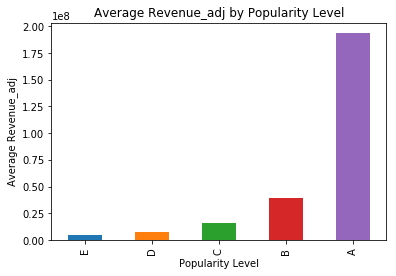

In [30]:
# 绘制不同受欢迎程度，对应的票房平均值

df_pop_level.revenue_adj.plot(kind='bar')
plt.ylabel('Average Revenue_adj')
plt.title('Average Revenue_adj by Popularity Level')
plt.xlabel('Popularity Level');

>**在不受时间影响下，越受欢迎的电影，票房越高**

## Q3 评分与票房的关系

In [31]:
#查看 评分 的打分 分布

df_2.vote_average.describe()

count    10731.000000
mean         5.964710
std          0.930283
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

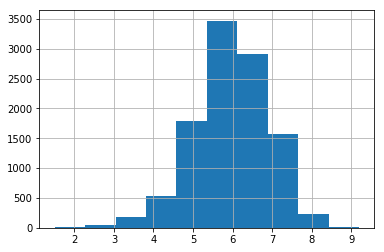

In [32]:
# 查看评分的频数分布图

df_2.vote_average.hist()

>**大部分的评分都在5-7分之间**

In [33]:
# 将评分按照5个等级，分级 A B C D E

df_2['vote_level'] = pd.cut(df_2.vote_average,[0,2,4,6,8,10],labels=['E','D','C','B','A'])

df_vote_level = df_2.groupby('vote_level').mean()
df_vote_level

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue
vote_level,,,,,,,,
E,0.078773,12.666667,1.666667,1995.000000,4.254743e+04,0.000000e+00,6.333333e+03,0.000000e+00
D,0.310117,27.507740,3.522291,2006.340557,5.851302e+06,3.507401e+06,4.914485e+06,2.601555e+06
C,0.498147,109.856345,5.367360,2002.442904,1.583082e+07,3.008111e+07,1.342637e+07,2.491031e+07
B,0.823499,336.128289,6.700232,1999.744582,2.050655e+07,7.667115e+07,1.685967e+07,5.801393e+07
A,1.365550,961.250000,8.297727,2002.681818,1.277436e+07,1.022336e+08,9.468184e+06,6.039041e+07


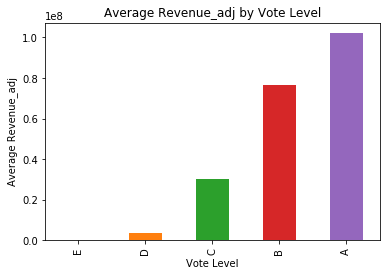

In [34]:
#绘制不同等级的票房柱状图

df_vote_level.revenue_adj.plot(kind='bar')
plt.ylabel('Average Revenue_adj')
plt.title('Average Revenue_adj by Vote Level')
plt.xlabel('Vote Level');

>**评分高，受欢迎高，票房就会高**

## Q4 评分与受欢迎程度，哪个与票房关系更密切

Text(0.5,1,'Revenue_adj by Popularity and Vote_average')

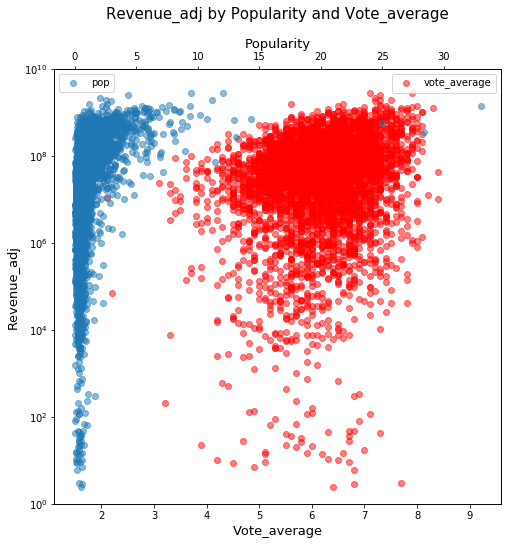

In [35]:
# 绘制电影票房与评分和受欢迎程度的散点图

fig = plt.figure(figsize=(8,8)) #创建画布
y=df_2.revenue_adj
x=df_2.popularity

y1=df_2.revenue_adj
x1=df_2.vote_average

ax1 = fig.add_subplot(111)     #在画布上创建 第一幅图
ax1.scatter(x1, y1, c='r',alpha=0.5,label='vote_average')
ax1.set_yscale('log')
plt.xlabel('Vote_average',fontsize=13)

ax2 = ax1.twiny()             # 将第二幅图与第一幅图设置为共同的y轴
ax2.scatter(x, y,alpha=0.5, label='pop')
ax2.set_yscale('log')
plt.ylim([1,1e10])
plt.xlabel('Popularity',fontsize=13)

ax1.set_ylabel('Revenue_adj',fontsize=13)
ax2.legend(loc='upper left')
ax1.legend(loc='upper right')
ax1.set_title('Revenue_adj by Popularity and Vote_average',fontsize=15,pad=50.0)

>**相对评分来说，电影票房与受欢迎程关系更密切**

## Q5 导演 与票房 

In [37]:
df_2.groupby('director').mean().sort_values(by='revenue_adj',ascending=False).head()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue
director,,,,,,,,
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,2.631987,913.0,6.6,1961.0,2.917944e+07,1.574815e+09,4000000.0,2.158800e+08
Roger Allers|Rob Minkoff,4.782688,3489.0,7.7,1994.0,6.620002e+07,1.159592e+09,45000000.0,7.882418e+08
Kyle Balda|Pierre Coffin,7.404165,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09,74000000.0,1.156731e+09
Lee Unkrich,2.711136,2924.0,7.5,2010.0,2.000000e+08,1.063172e+09,200000000.0,1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon,2.191033,1676.0,6.5,2004.0,1.731668e+08,1.061904e+09,150000000.0,9.198388e+08


>**发现导演里面有字符'|'，有的电影里有多个导演**

In [38]:
# 查看包含字符‘|’的导演的个数

df_2['director'].str.contains('|',regex=False).sum()

737

In [39]:
# 把包含‘|’的行，提取出来

df_multi_director = df_2[df_2['director'].str.contains('|',regex=False)]   # 选出df_2中导演并非一个的 电影
df_multi_director.index

Int64Index([    8,    11,    64,    85,   100,   132,   143,   144,   184,
              214,
            ...
            10663, 10671, 10678, 10732, 10791, 10795, 10798, 10816, 10820,
            10843],
           dtype='int64', length=737)

In [40]:
# 多个导演中的第一个导演，设为该电影的主要导演

df_multi_director.loc[:,'director'] = df_multi_director.director.apply(lambda x : x.split('|')[0])
df_multi_director.head()

C:\Users\49071\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,popularity,genres,cast,director,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue,pop_level,vote_level
8,7.404165,Family|Animation|Adventure|Comedy,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda,2893,6.5,2015,6.807997e+07,1.064192e+09,74000000,1156730962,A,B
11,6.189369,Science Fiction|Fantasy|Action|Adventure,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski,1937,5.2,2015,1.619199e+08,1.692686e+08,176000003,183987723,A,C
64,2.395366,Romance|Comedy|Crime|Drama,Will Smith|Margot Robbie|Rodrigo Santoro|Rober...,Glenn Ficarra,1831,6.7,2015,4.609198e+07,1.416459e+08,50100000,153962963,A,B
85,2.000338,Adventure|Comedy,Ed Helms|Christina Applegate|Skyler Gisondo|St...,John Francis Daley,846,6.1,2015,2.851999e+07,9.603341e+07,31000000,104384188,A,B
100,1.724712,Adventure|Animation|Family,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck,475,7.0,2015,0.000000e+00,0.000000e+00,0,0,A,B


In [41]:
# 把多个导演的row 从df_2中去除
df_2.drop(index=df_multi_director.index).head()

,popularity,genres,cast,director,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue,pop_level,vote_level
0,32.985763,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,5562,6.5,2015,1.379999e+08,1.392446e+09,150000000,1513528810,A,B
1,28.419936,Action|Adventure|Science Fiction|Thriller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,6185,7.1,2015,1.379999e+08,3.481613e+08,150000000,378436354,A,B
2,13.112507,Adventure|Science Fiction|Thriller,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2480,6.3,2015,1.012000e+08,2.716190e+08,110000000,295238201,A,B
3,11.173104,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,5292,7.5,2015,1.839999e+08,1.902723e+09,200000000,2068178225,A,B
4,9.335014,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2947,7.3,2015,1.747999e+08,1.385749e+09,190000000,1506249360,A,B


In [42]:
# 将df_multi_director 与df_2剩下的行 合并在一起 ，形成director中，只有一个导演的df_director
df_director = df_2.drop(index=df_multi_director.index).append(df_multi_director,ignore_index=True) 

In [43]:
df_director.index

RangeIndex(start=0, stop=10731, step=1)

In [44]:
df_director_grouped = df_director.groupby('director',as_index=False).mean().sort_values(by='revenue_adj',ascending=False)
df_director_grouped.head()

,director,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget,revenue
843,Clyde Geronimi,2.631987,913.0,6.60,1961.000000,2.917944e+07,1.574815e+09,4.000000e+06,2.158800e+08
1594,George Lucas,3.910306,2116.5,6.70,1987.833333,7.829333e+07,1.052320e+09,6.009233e+07,5.527585e+08
2767,Lee Unkrich,2.957715,3411.5,7.40,2005.500000,1.708106e+08,8.781367e+08,1.575000e+08,8.129941e+08
1144,David Yates,4.163195,2766.8,7.14,2008.400000,1.566050e+08,8.354911e+08,1.550000e+08,8.308591e+08
482,Bob Peterson,4.908902,4225.0,7.60,2009.000000,1.778701e+08,7.433371e+08,1.750000e+08,7.313427e+08


Text(0.5,1,'Average Revenue_adj by Director Number')

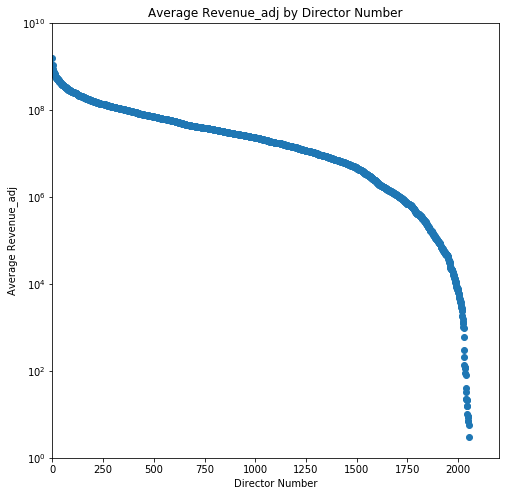

In [45]:
# 将df_director_grouped中director列中的导演，用0-4791，序号编排
# 绘制导演编号与对应的票房关系

fig = plt.figure(figsize=(8,8))

plt.scatter(x=np.arange(len(df_director_grouped.revenue_adj)),y=df_director_grouped.revenue_adj)
plt.yscale('log')
plt.ylim([1,1e10])
plt.xlim([0,2200])
plt.xlabel('Director Number')
plt.ylabel('Average Revenue_adj')
plt.title('Average Revenue_adj by Director Number')

>**可以看出，不同导演的平均票房有很大的差别**

## Q6 演员 和 票房

In [48]:
# 设置一个get_len函数，得到每一个元素的长度

def get_len(x):
    return len(x)

In [49]:
# 查看cast列中，最多有多少个演员

df_2.cast.str.split('|').apply(get_len).max() 

5

>因此，可以把cast分成5列，像研究电影类型一样，处理演员表。

In [50]:
# 生成将cast分裂成5列

df_cast = pd.DataFrame(data= df_2.cast.str.split('|').tolist(), columns=['cast1','cast2','cast3','cast4','cast5'])
df_cast.head()

,cast1,cast2,cast3,cast4,cast5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [51]:
# 新增一列电影票房列

df_cast['revenue_adj'] = df_2.revenue_adj.values

In [52]:
df_cast.count()

cast1          10731
cast2          10594
cast3          10510
cast4          10404
cast5          10095
revenue_adj    10731
dtype: int64

In [53]:
# 将cast1 - cast5 放在同一列中

df_cast_revenue = df_cast.melt(id_vars='revenue_adj', value_vars=['cast1','cast2','cast3','cast4','cast5'],value_name='cast')
df_cast_revenue.head()

,revenue_adj,variable,cast
0,1.392446e+09,cast1,Chris Pratt
1,3.481613e+08,cast1,Tom Hardy
2,2.716190e+08,cast1,Shailene Woodley
3,1.902723e+09,cast1,Harrison Ford
4,1.385749e+09,cast1,Vin Diesel


In [54]:
# 按照cast分组，并按电影票房排序

df_cast_grouped = df_cast_revenue.groupby('cast',as_index=False).mean().sort_values(by='revenue_adj',ascending=False)
df_cast_grouped.head()

,cast,revenue_adj
3880,Daisy Ridley,1.902723e+09
15319,Robert MacNaughton,1.791694e+09
7412,J. Pat O'Malley,1.574815e+09
1909,Betty Lou Gerson,1.574815e+09
1818,Ben Wright,1.574815e+09


Text(0.5,1,'Average Revenue_adj by Cast Number')

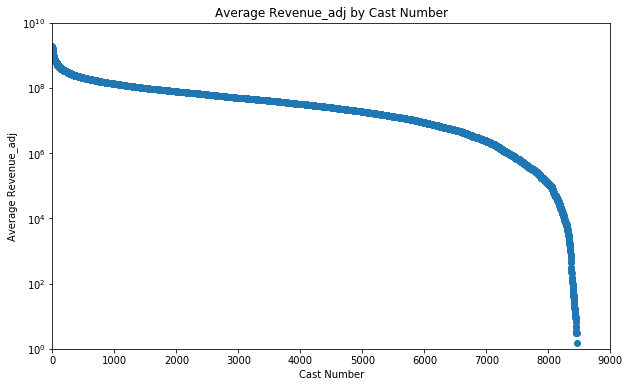

In [55]:
# 将df_cast_grouped中cast列中的演员，用0-18929序号编排
# 绘制演员编号与对应的票房关系

fig = plt.figure(figsize=(10,6))

plt.scatter(x=np.arange(len(df_cast_grouped.revenue_adj)),y=df_cast_grouped.revenue_adj)
plt.yscale('log')
plt.ylim([1,1e10])
plt.xlim([0,9000])
plt.xlabel('Cast Number')
plt.ylabel('Average Revenue_adj')
plt.title('Average Revenue_adj by Cast Number')

>- 分析过受欢迎程度、电影评分、电影导演与票房的关系后，看一看演员的不同是否与票房有关
- 用与研究导演与票房关系相同方法，将不同演员进行编号，进而查看不同演员与其参演电影票房的关系  


>- 利用散点图，横坐标为演员编号，纵坐标为经过通货膨胀调整后的票房平均值
- 从图中可知，不同演员参演的电影，其票房均值有比较大的差异

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

**结论：**
1. 在不考虑其他影响条件下，不同电影类别的受欢迎程度有区别。  
  1.1. Adventure, Science Fiction, Fantasy这三类电影最受欢迎  
  1.2. TV Movie, Foreign, Documentary 这三类最不受欢迎
2. 影响票房的因素有时间、受欢迎程度、评分、导演以及演员  
  2.1.  时间：随时间变化，票房有增加；经过通货膨胀调整后的票房，可以减除时间对票房的影响。  
  2.2. 受欢迎程度与评分  
    - 受欢迎程度：排除时间对票房影响，越受欢迎的电影，票房越高。    
    + 电影平均评分：排除时间对票房影响，评分越高的电影，票房越高。  
    - 相对评分来说，电影票房与受欢迎程关系更密切  
    
  2.3. 电影导演：未考虑因素下，导演不同，电影票房有很大差距  
  2.4. 演员：未考虑其他因素下，演员不同，电影票房有很大区别

补充说明： 
  - 虽然已探讨4种与电影票房相关的特征值，不过，电影票房还有可能与发行公司、电影时长、电影成本、电影类型等有微弱的关系。
  - 数据中有很多票房为0的异常值，不过，去掉这些异常值，对分析结果不会造成显著影响。因此，没有去除。
  - 本项目只探索了特征之间的相互关系，并没有他们之间的因果关系。

 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])